## Regularization

**Regularization** is a very important tool for improving the performance of ANNs. Regularization helps to reduce the overfit and variance of models. Helps to get better test set performance. For Neural networks there are two most popular **Regularization** techniques, **L_2** regularization and **Dropout** regularization. In this notebook we will use both of these techniques in **TensorFlow**.

**Dropout** paper: https://arxiv.org/abs/1207.0580

In [1]:
#Do regular imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#Get MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
#Lets build a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1980 - accuracy: 0.9398 - val_loss: 0.1108 - val_accuracy: 0.9663
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9726 - val_loss: 0.0861 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0614 - accuracy: 0.9807 - val_loss: 0.0833 - val_accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0713 - val_accuracy: 0.9778
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0880 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0876 - val_accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0871 - val_accuracy:

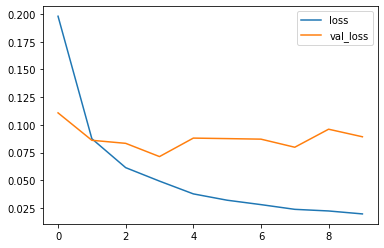

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

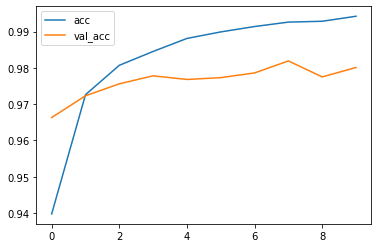

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9801
[0.08922499418258667, 0.9800999760627747]


In [8]:
# Now lets apply an L2 regularization to first dense layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu', kernel_regularizer='l2'),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5852 - accuracy: 0.9154 - val_loss: 0.3389 - val_accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3220 - accuracy: 0.9450 - val_loss: 0.2698 - val_accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.9533 - val_loss: 0.2650 - val_accuracy: 0.9541
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2489 - accuracy: 0.9562 - val_loss: 0.2296 - val_accuracy: 0.9621
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2336 - accuracy: 0.9583 - val_loss: 0.2217 - val_accuracy: 0.9606
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2195 - accuracy: 0.9600 - val_loss: 0.2447 - val_accuracy: 0.9515
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2119 - accuracy: 0.9620 - val_loss: 0.2160 - val_accuracy:

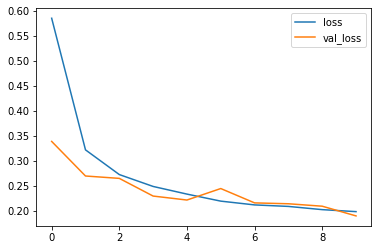

In [10]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

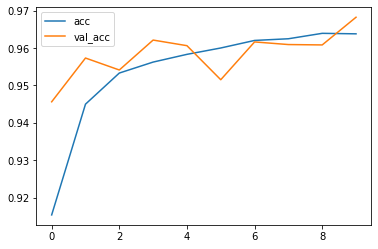

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

We can see from above after a little bit of regularization dev and train set accuracies are very similar.

In [12]:
#Lets try now Dropout regularization - we have applied two dropout layers after Dense layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(196, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(98, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3194 - accuracy: 0.9020 - val_loss: 0.1220 - val_accuracy: 0.9633
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1688 - accuracy: 0.9499 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1343 - accuracy: 0.9604 - val_loss: 0.0967 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1185 - accuracy: 0.9646 - val_loss: 0.0846 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1046 - accuracy: 0.9676 - val_loss: 0.0755 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0972 - accuracy: 0.9711 - val_loss: 0.0808 - val_accuracy: 0.9746
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 0.0672 - val_accuracy:

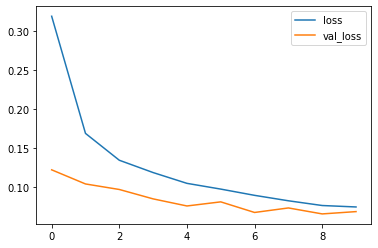

In [14]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

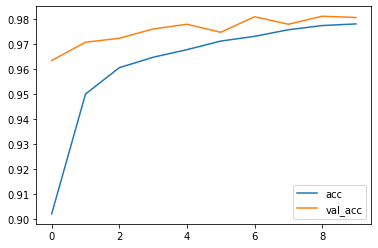

In [15]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

We have very nice validation and train set accuracies now.